### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from sklearn.metrics import f1_score
from joblib import load

import sys
sys.path.append("../utils")
from split_utils import get_features_data
from train_utils import get_dataset, get_X_y_data
from evaluate_utils import evaluate_model_cm, evaluate_model_score

### Load necessary data

In [2]:
# specify results directory
results_dir = pathlib.Path("evaluations/")
results_dir.mkdir(parents=True, exist_ok=True)

# load features data from indexes and features dataframe
data_split_path = pathlib.Path("../1.split_data/indexes/data_split_indexes.tsv")
data_split_indexes = pd.read_csv(data_split_path, sep="\t", index_col=0)
features_dataframe_path = pathlib.Path("../0.download_data/data/training_data.csv.gz")
features_dataframe = get_features_data(features_dataframe_path)

### Evaluate best model

In [3]:
model_dir = pathlib.Path("../2.train_model/models/")
log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Evaluate with training data

In [4]:
training_data = get_dataset(features_dataframe, data_split_indexes, "train")
training_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,MetaphaseAlignment,572.214286,58.185714,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.048350,-0.721622,0.749788,-1.377590,0.454974,0.188488,0.141427,-1.553405,2.346107,-1.774278
2,Artefact,1116.500000,362.000000,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.093582,-0.323180,-0.663069,-1.427502,-0.901764,-0.355080,0.418053,-2.298449,1.098266,-0.069326
3,Artefact,1106.348485,370.469697,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,0.943948,-0.211267,-0.346355,-1.365543,-0.276932,0.023856,0.376514,-1.700348,1.833686,-0.625385
4,MetaphaseAlignment,937.692308,521.048077,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,0.947300,-0.564136,0.333336,-1.584454,0.891666,1.223252,-0.359166,-0.826366,2.115734,-1.241848
5,Prometaphase,1305.853333,656.426667,LT0066_19,287,1,1,LT0066_19_287,LT0066_19/LT0066_19_287_1.tif,ch-TOG,...,1.581095,0.635676,-0.597231,-1.204226,0.247975,0.923955,0.060671,-2.054225,1.040119,-0.528491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,OutOfFocus,383.075269,220.198925,LT0601_01,217,49,1,LT0601_01_217,LT0601_01/LT0601_01_217_49.tif,ABCB8,...,0.525202,8.110262,1.777901,-1.512628,-0.225867,-1.612982,-0.679415,-2.581475,0.501395,1.981009
7507,OutOfFocus,975.747253,293.868132,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.277908,5.959773,2.362540,-1.000032,-0.723652,-1.460720,-1.919148,-0.301130,0.779582,3.084642
7508,OutOfFocus,898.614815,302.407407,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,0.553313,10.086836,1.170072,-1.317000,-0.994644,-1.406541,-0.104613,-0.056216,0.714624,1.612470
7509,OutOfFocus,946.758621,281.689655,LT0603_03,2,49,1,LT0603_03_2,LT0603_03/LT0603_03_2_49.tif,failed QC,...,-0.152000,11.078217,2.460915,-0.989282,-1.141723,-1.424882,-2.959780,-1.999795,0.702134,2.306039


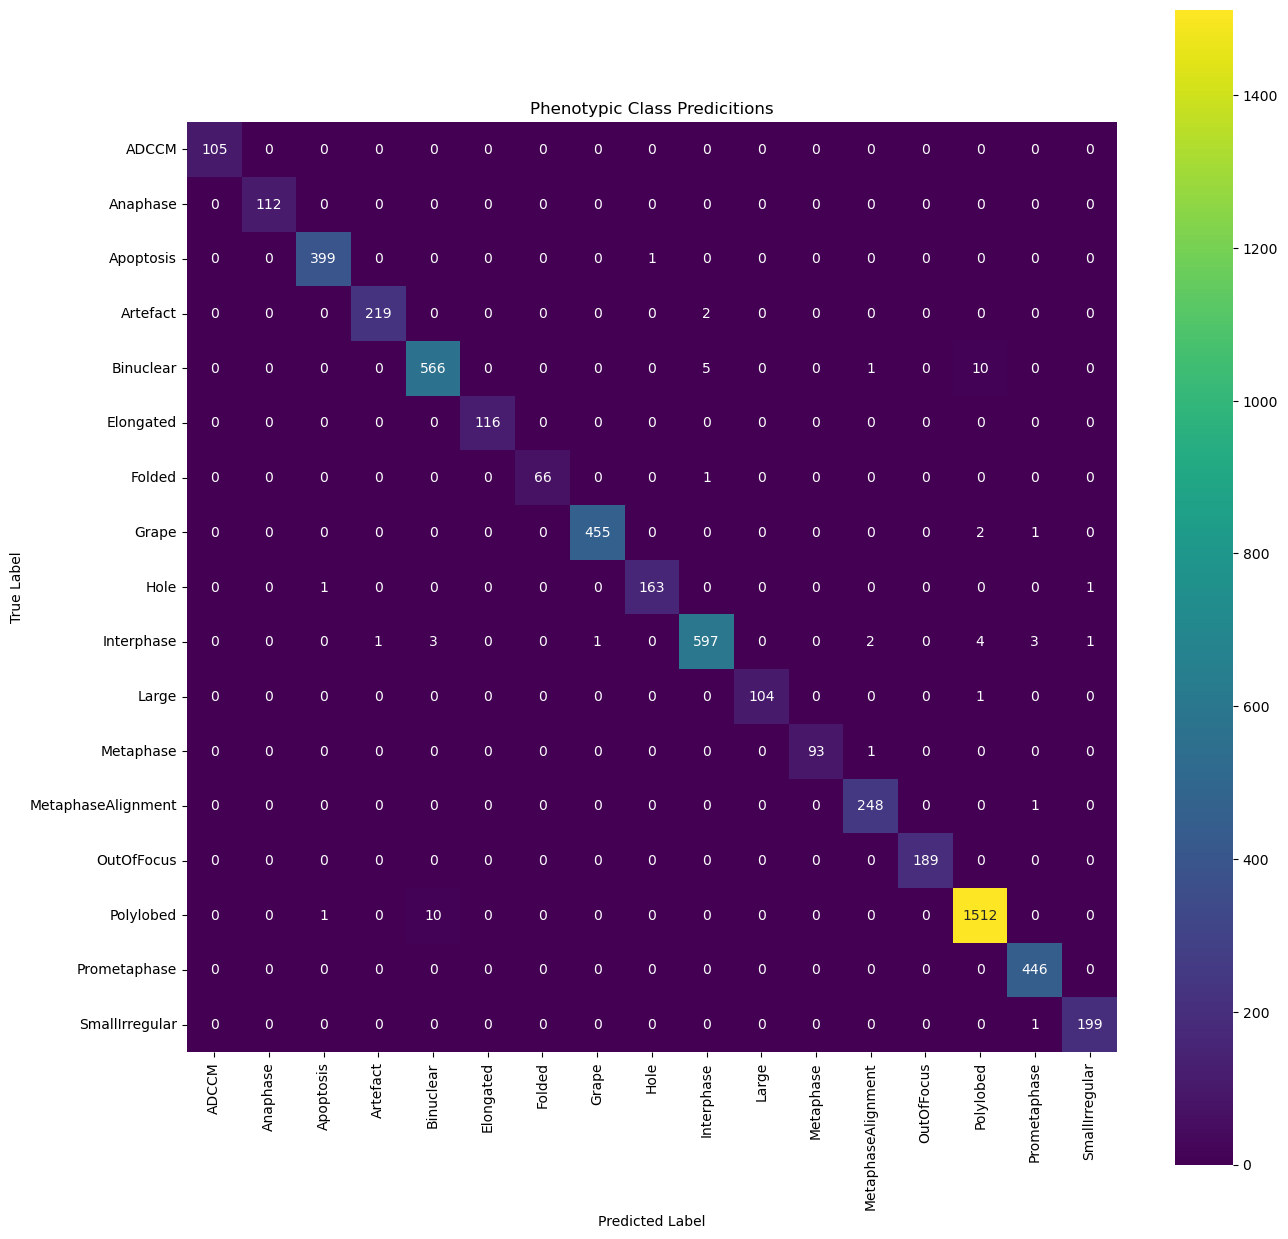

In [5]:
y_train, y_train_pred = evaluate_model_cm(log_reg_model, training_data)

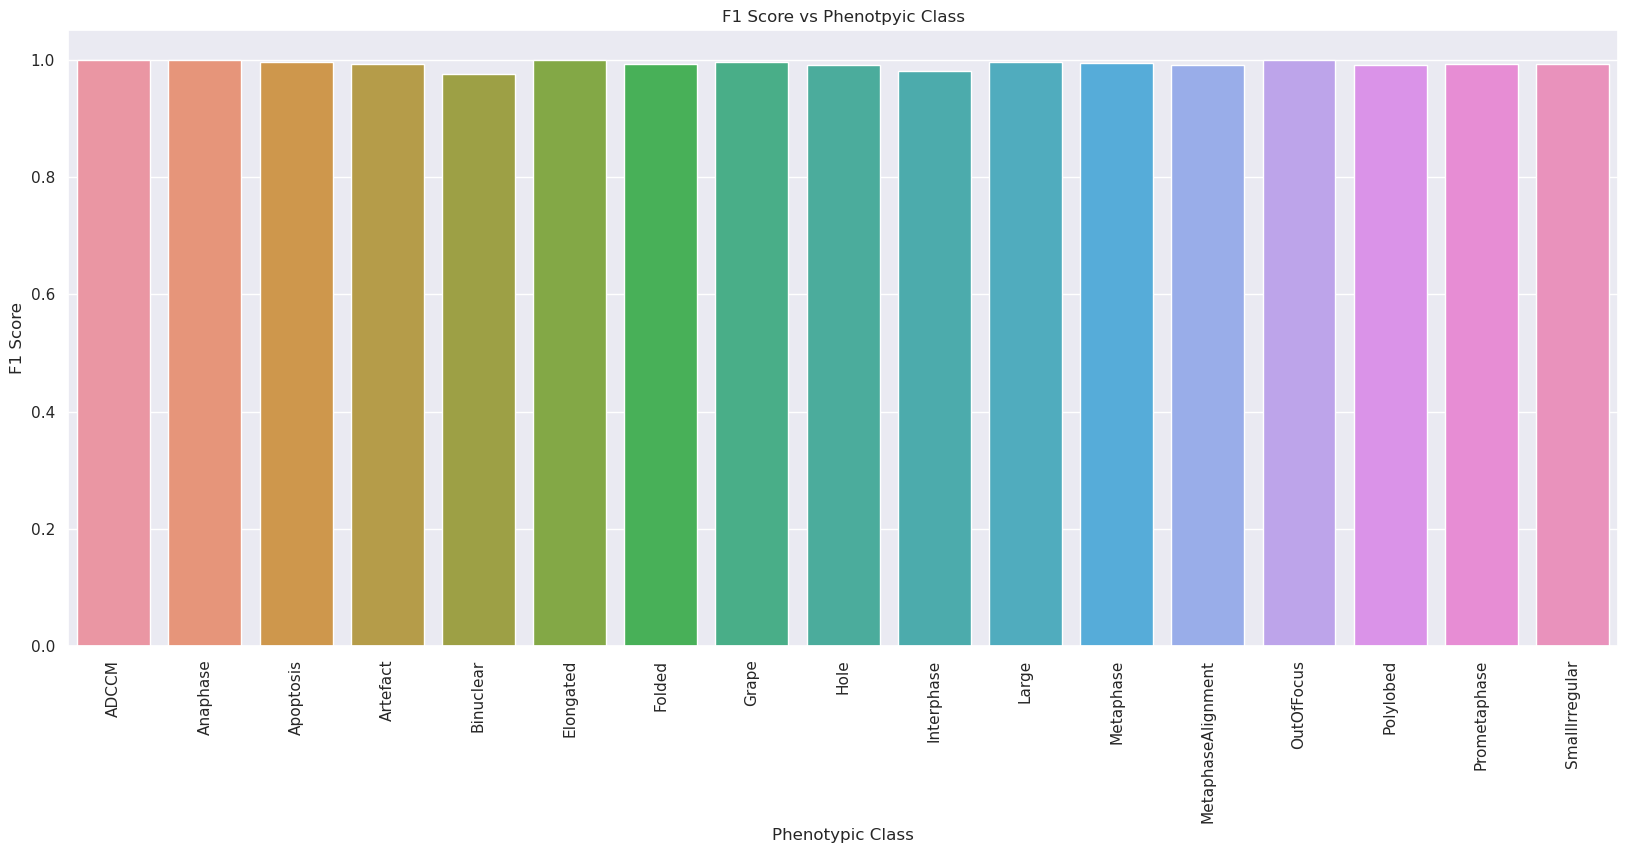

In [6]:
evaluate_model_score(log_reg_model, training_data)

### Evaluate with testing data

In [7]:
testing_data = get_dataset(features_dataframe, data_split_indexes, "test")
testing_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
3652,ADCCM,239.431034,28.206897,LT0043_48,166,48,1,LT0043_48_166,LT0043_48/LT0043_48_166_48.tif,OGG1,...,0.963000,-0.618714,-0.204918,-0.825086,-0.684258,-0.155098,0.378375,-1.407173,0.336713,-0.165821
5816,ADCCM,488.619048,71.892857,LT0030_17,184,39,1,LT0030_17_184,LT0030_17/LT0030_17_184_39.tif,RGR,...,1.426140,-0.348491,1.138300,-1.378647,-1.103623,-0.619583,-0.225318,-0.598133,1.475777,1.937727
5812,ADCCM,684.666667,387.898148,LT0023_04,5,72,1,LT0023_04_5,LT0023_04/LT0023_04_5_72.tif,MYST1,...,1.327282,-0.897882,-0.705561,-1.061531,-0.537887,0.010725,0.417082,-1.380004,-0.024038,0.658558
1114,ADCCM,637.014286,276.028571,LT0042_10,44,28,1,LT0042_10_44,LT0042_10/LT0042_10_44_28.tif,CGI-63,...,1.490947,0.630154,1.296323,-1.350022,-1.383894,-0.620152,0.595732,-0.187641,2.106002,-0.427294
4576,ADCCM,165.891304,203.956522,LT0030_17,184,50,1,LT0030_17_184,LT0030_17/LT0030_17_184_50.tif,RGR,...,1.136241,1.225071,-0.867703,-1.484953,-0.098709,0.614611,0.452469,-0.443152,0.879568,1.837628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,SmallIrregular,589.881579,197.131579,LT0030_17,184,36,1,LT0030_17_184,LT0030_17/LT0030_17_184_36.tif,RGR,...,0.379441,2.464849,0.138720,-1.200270,0.195572,2.296880,-0.148939,-0.096313,1.229762,1.824338
6115,SmallIrregular,638.571429,21.678571,LT0094_44,319,74,1,LT0094_44_319,LT0094_44/LT0094_44_319_74.tif,ENSG00000177426,...,1.199309,0.956834,-0.125711,-1.498977,0.351095,2.385405,0.490640,-0.449707,1.590920,0.357183
4530,SmallIrregular,706.635135,379.905405,LT0030_17,184,36,1,LT0030_17_184,LT0030_17/LT0030_17_184_36.tif,RGR,...,-0.699390,-0.621268,-0.526315,-0.691676,0.905203,0.788800,-0.744250,0.848308,-0.846790,1.618947
6042,SmallIrregular,1069.333333,556.666667,LT0030_17,184,41,1,LT0030_17_184,LT0030_17/LT0030_17_184_41.tif,RGR,...,-0.989702,0.328951,0.148018,-1.476288,-0.351090,0.262334,-3.175525,-0.083937,-0.325123,1.650782


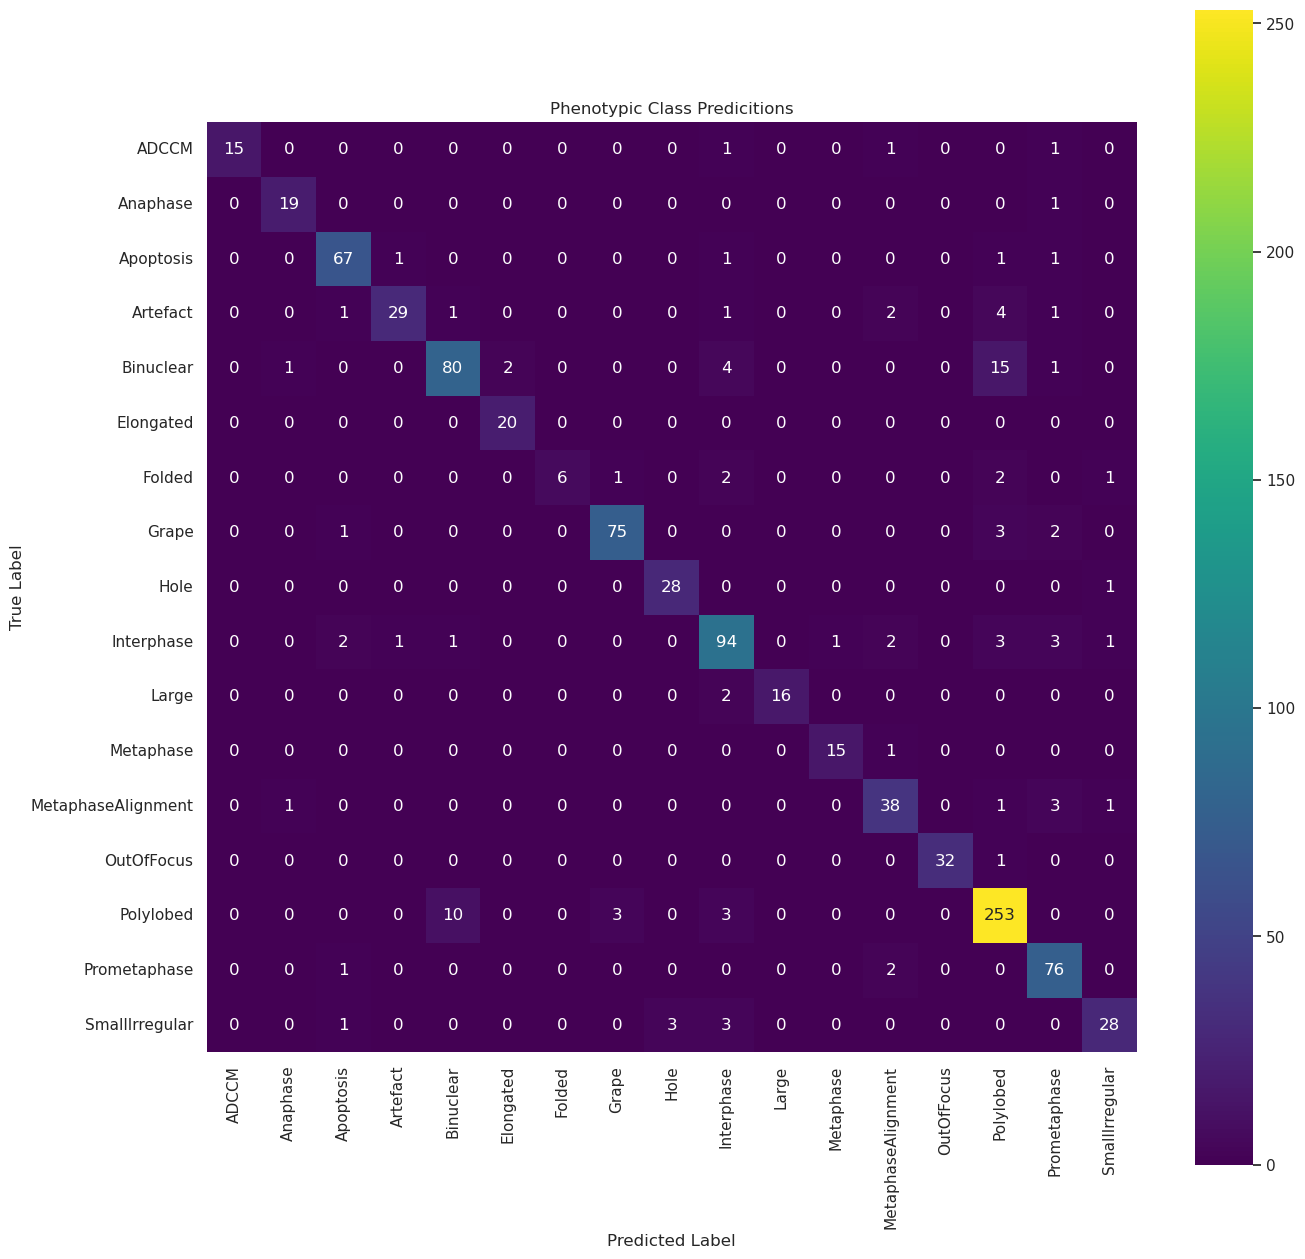

In [8]:
y_test, y_test_pred = evaluate_model_cm(log_reg_model, testing_data)

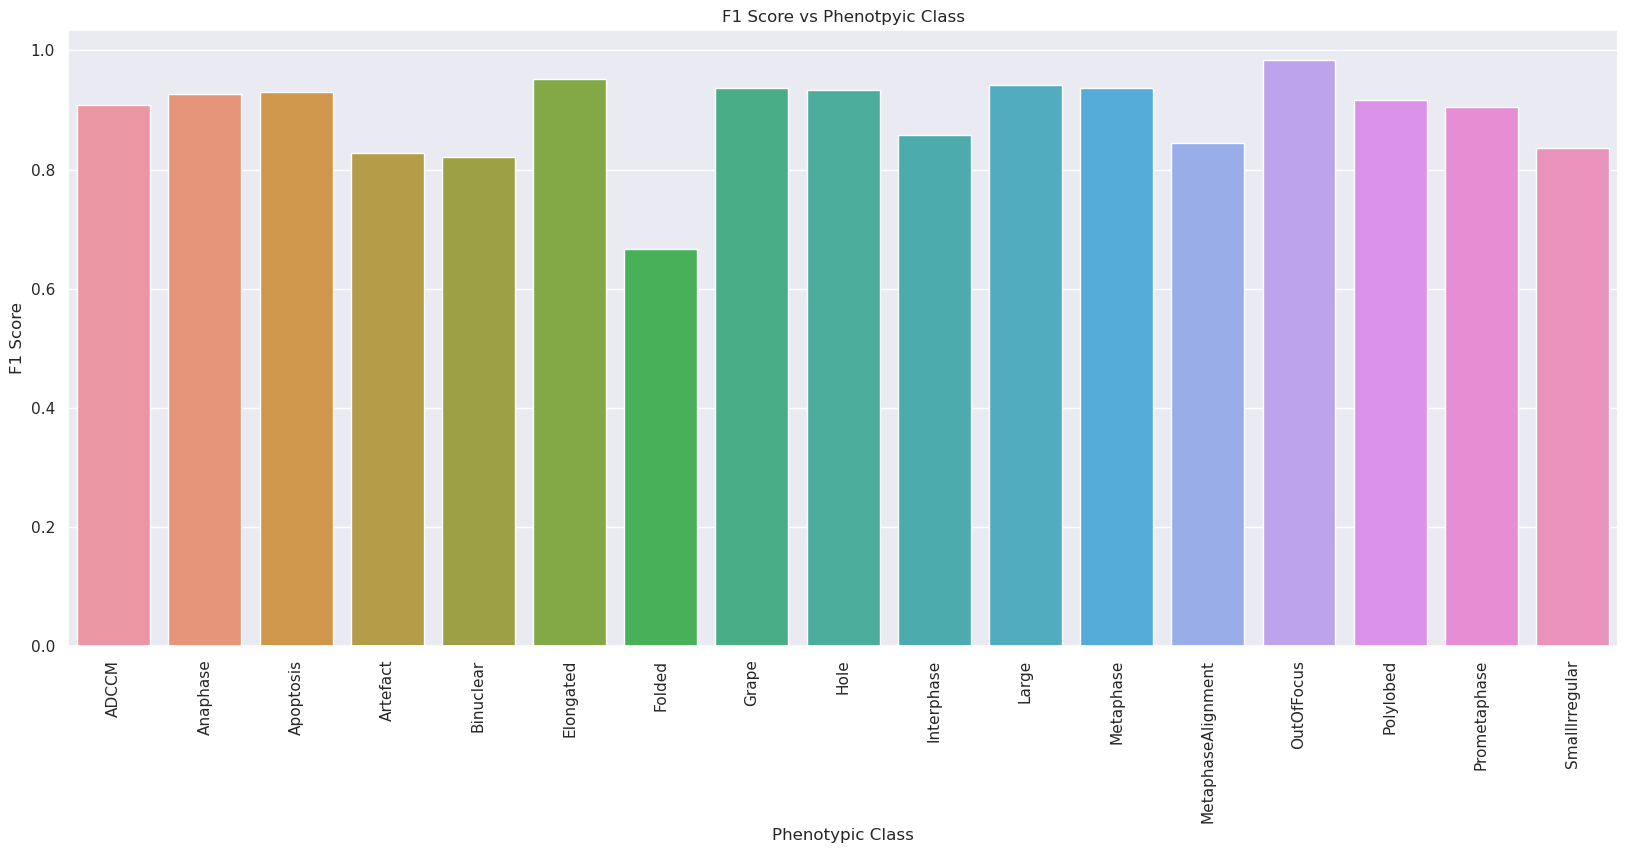

In [9]:
evaluate_model_score(log_reg_model, testing_data)

### Evaluate with holdout data

In [10]:
holdout_data = get_dataset(features_dataframe, data_split_indexes, "holdout")
X_holdout, y_holdout = get_X_y_data(holdout_data)
holdout_data

,Mitocheck_Phenotypic_Class,Location_Center_X,Location_Center_Y,Metadata_Plate,Metadata_Well,Metadata_Frame,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_Gene,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
4180,Binuclear,339.531646,102.683544,LT0013_38,42,47,1,LT0013_38_42,LT0013_38/LT0013_38_42_47.tif,KIF14,...,0.084957,-0.439837,2.509709,-1.141575,4.607355,-1.183145,-2.376263,0.501284,1.021818,0.525985
4181,Binuclear,313.157895,105.486842,LT0013_38,42,47,1,LT0013_38_42,LT0013_38/LT0013_38_42_47.tif,KIF14,...,1.771200,1.620717,2.006371,-1.174184,-1.240760,-1.444521,-1.777153,-0.238845,0.103475,0.954782
4182,Binuclear,481.560000,163.040000,LT0013_38,42,47,1,LT0013_38_42,LT0013_38/LT0013_38_42_47.tif,KIF14,...,1.298283,0.933616,-0.203031,-0.858697,-0.012509,-1.087678,-0.185721,1.662717,0.692328,0.926912
4183,Binuclear,504.597015,164.895522,LT0013_38,42,47,1,LT0013_38_42,LT0013_38/LT0013_38_42_47.tif,KIF14,...,1.218105,0.433697,-0.378255,-0.771321,-0.486238,-0.261173,0.232160,1.710955,0.405137,0.838639
4184,Binuclear,1108.963415,180.048780,LT0013_38,42,47,1,LT0013_38_42,LT0013_38/LT0013_38_42_47.tif,KIF14,...,0.738305,0.410069,-0.818087,-0.898705,1.182630,-0.263830,0.507225,1.719939,-0.329698,1.185222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7049,MetaphaseAlignment,1263.412698,446.841270,LT0090_33,383,92,1,LT0090_33_383,LT0090_33/LT0090_33_383_92.tif,failed QC,...,0.462901,-0.742089,-0.273465,-0.266623,0.918044,0.534037,1.152333,-0.065232,0.081612,1.066004
7050,MetaphaseAlignment,751.780822,611.917808,LT0090_33,383,92,1,LT0090_33_383,LT0090_33/LT0090_33_383_92.tif,failed QC,...,1.136063,-0.493981,-0.394500,-1.580663,3.496803,4.864113,-0.575706,-1.428618,0.624082,-1.574529
7051,MetaphaseAlignment,1030.236111,367.333333,LT0090_33,383,92,1,LT0090_33_383,LT0090_33/LT0090_33_383_92.tif,failed QC,...,-0.171608,0.281812,-0.392835,-1.272209,0.930717,2.671450,-0.443339,-1.061257,2.291107,-1.733399
7052,MetaphaseAlignment,250.357143,659.345238,LT0090_33,383,92,1,LT0090_33_383,LT0090_33/LT0090_33_383_92.tif,failed QC,...,0.560734,1.236253,0.147485,0.978985,1.201915,1.183157,0.147396,0.760459,-0.426372,0.044009


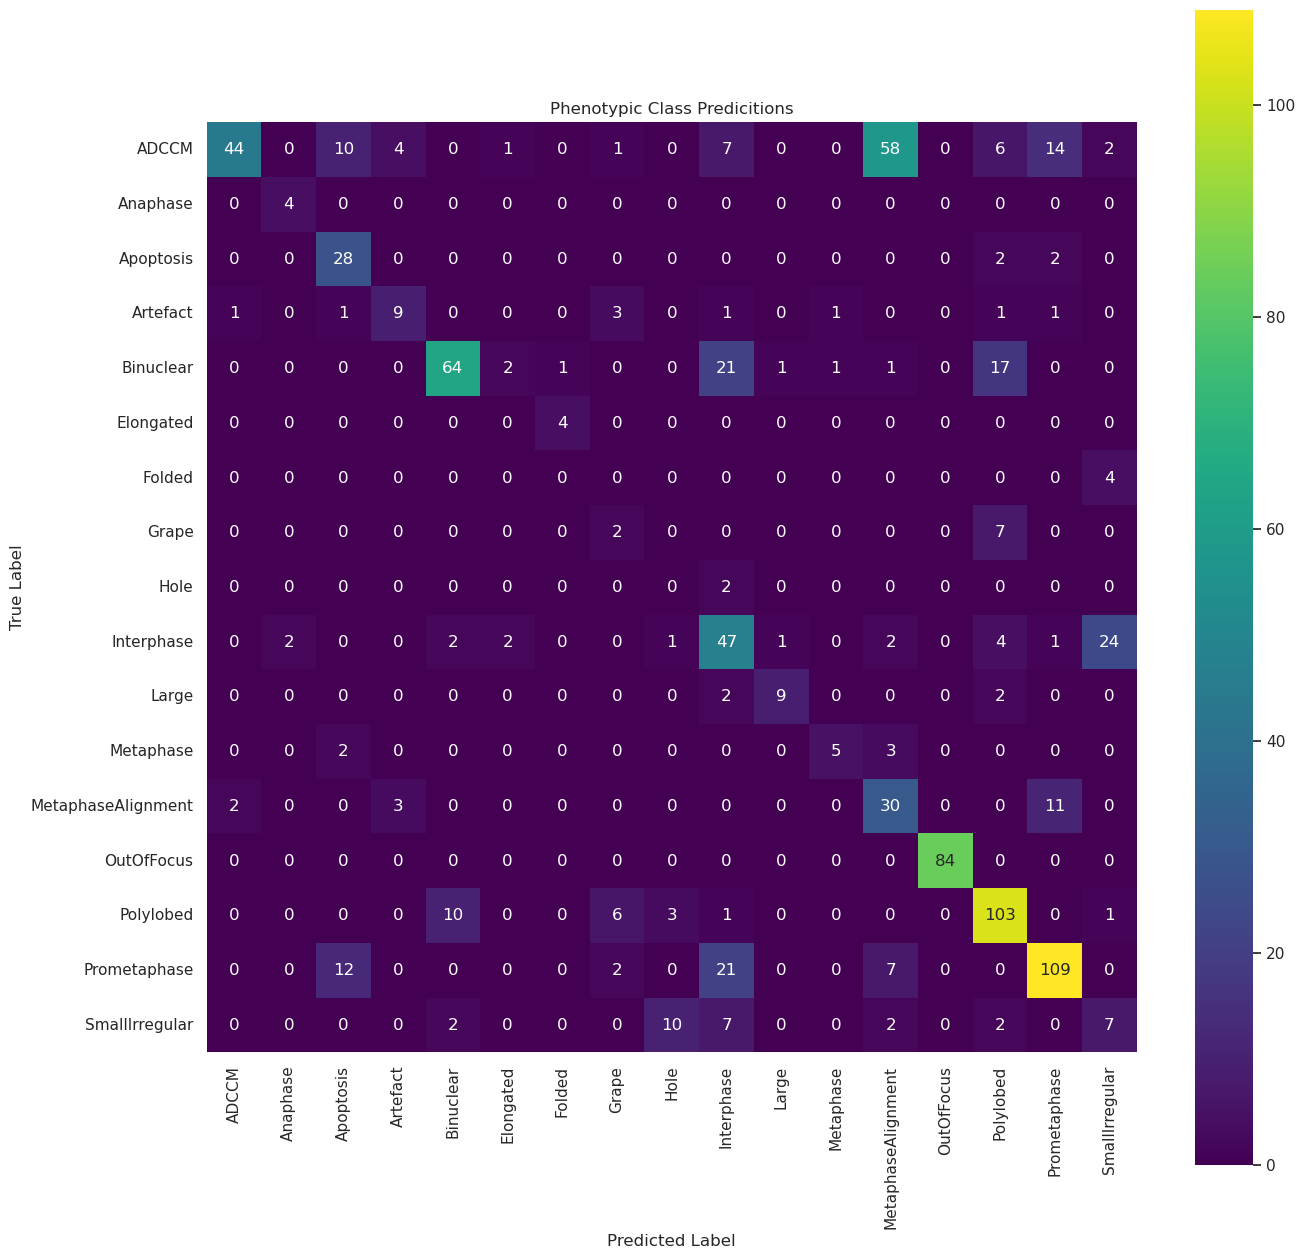

In [11]:
y_holdout, y_holdout_pred = evaluate_model_cm(log_reg_model, holdout_data)

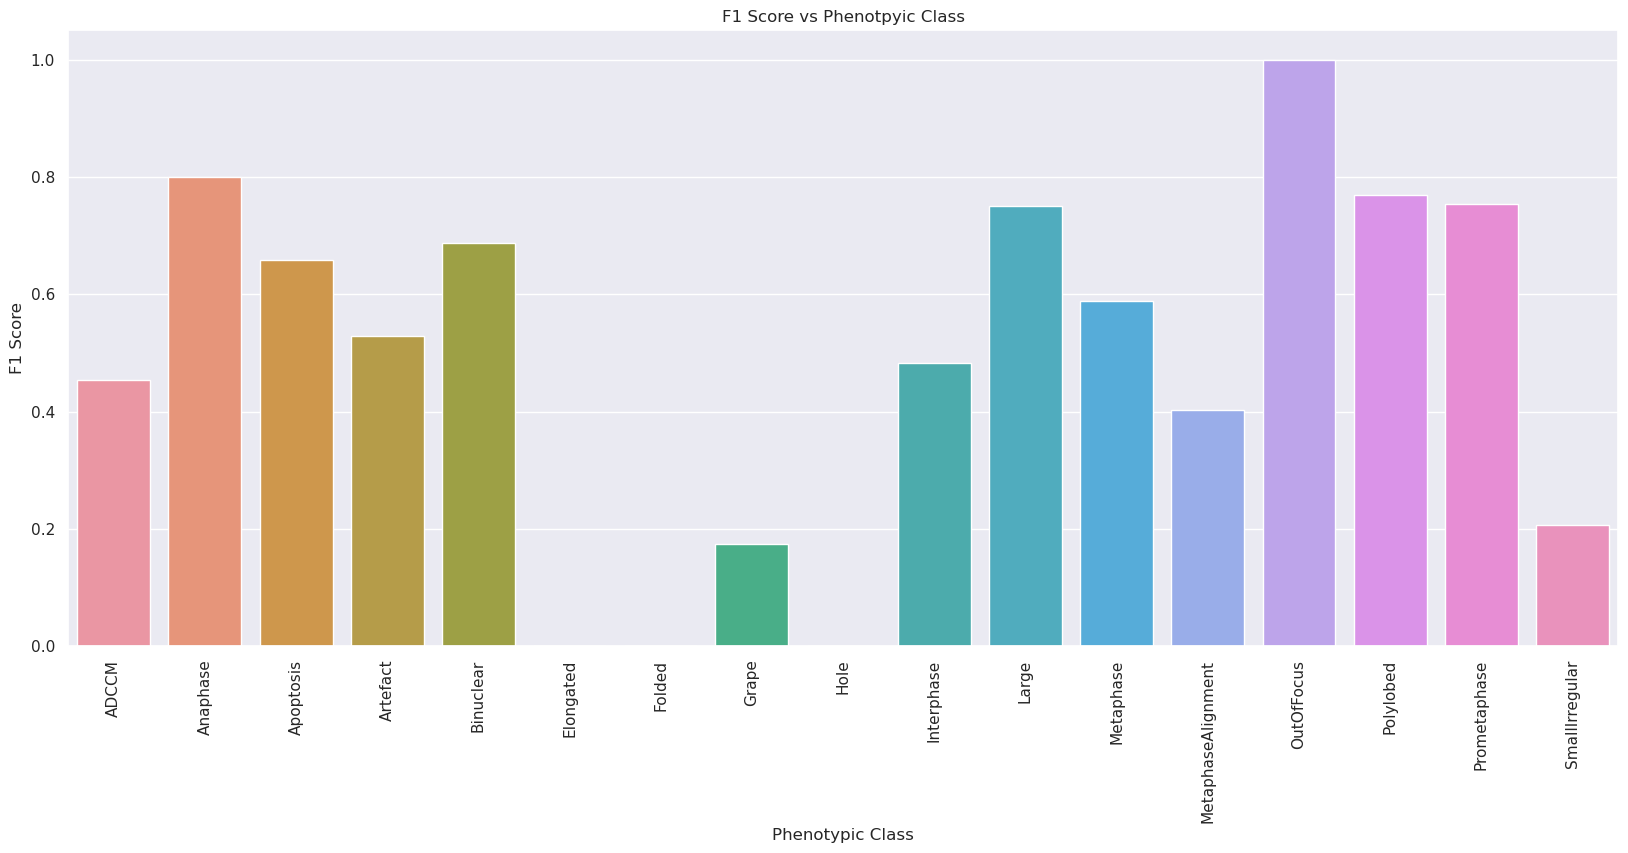

In [12]:
evaluate_model_score(log_reg_model, holdout_data)

### Save trained model predicitions

In [13]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/model_predictions.tsv", sep="\t")

### Evaluate shuffled baseline model

In [14]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path) 

### Evaluate with training data

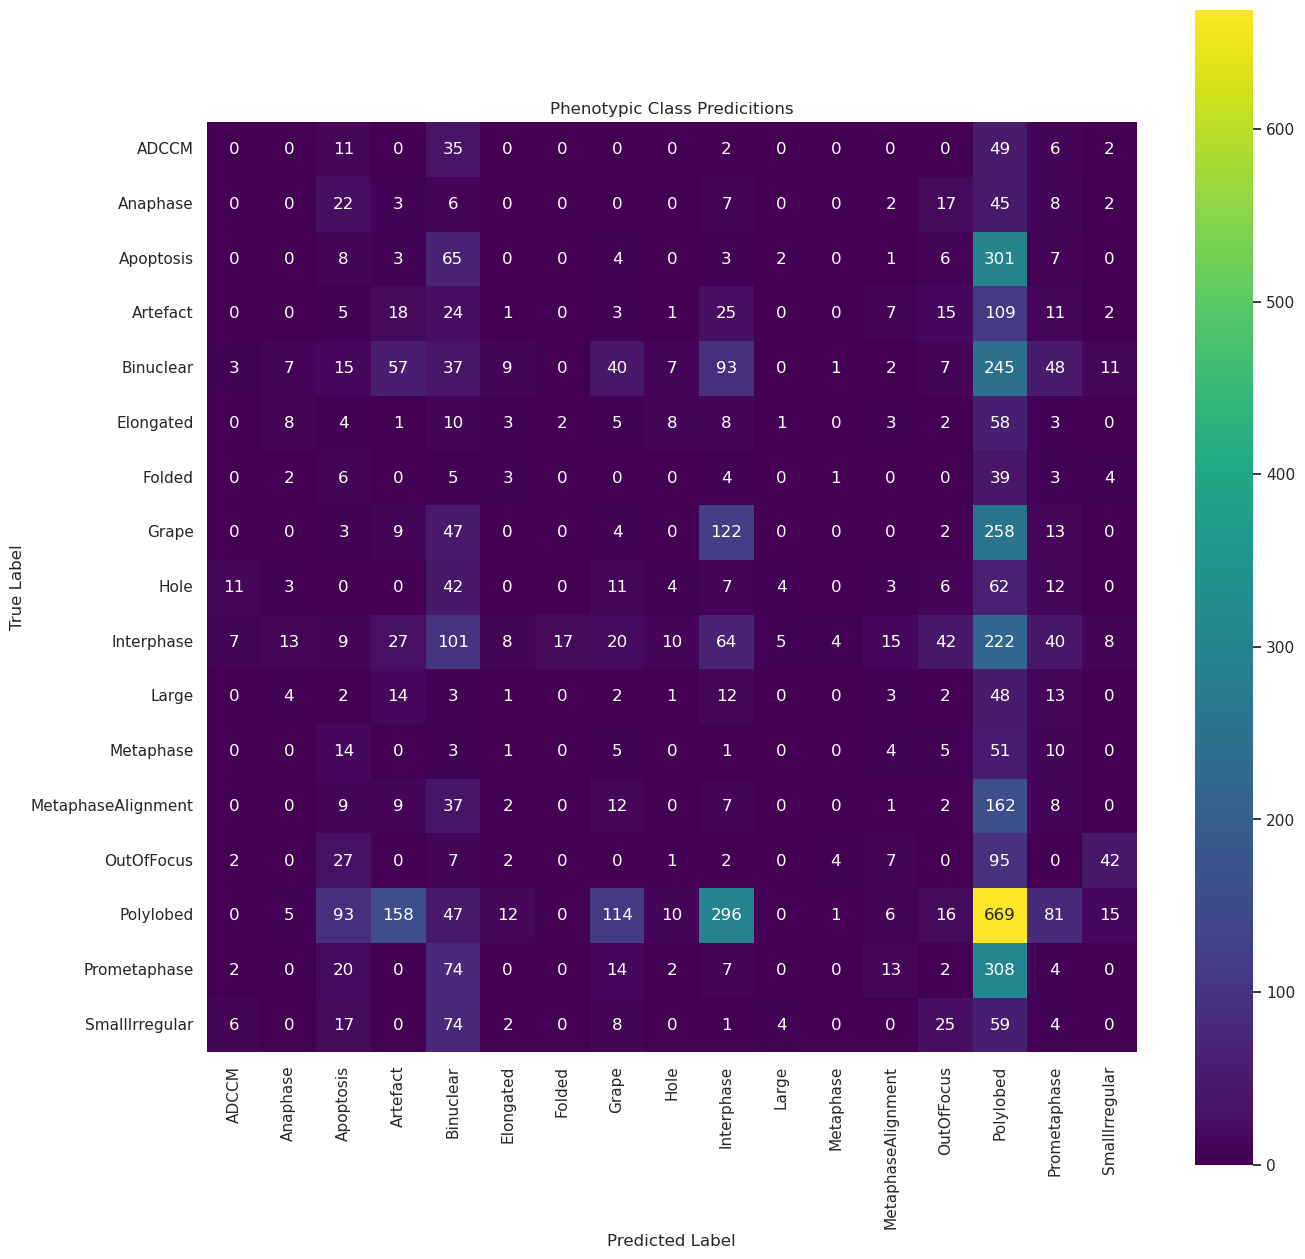

In [15]:
y_train, y_train_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, training_data)

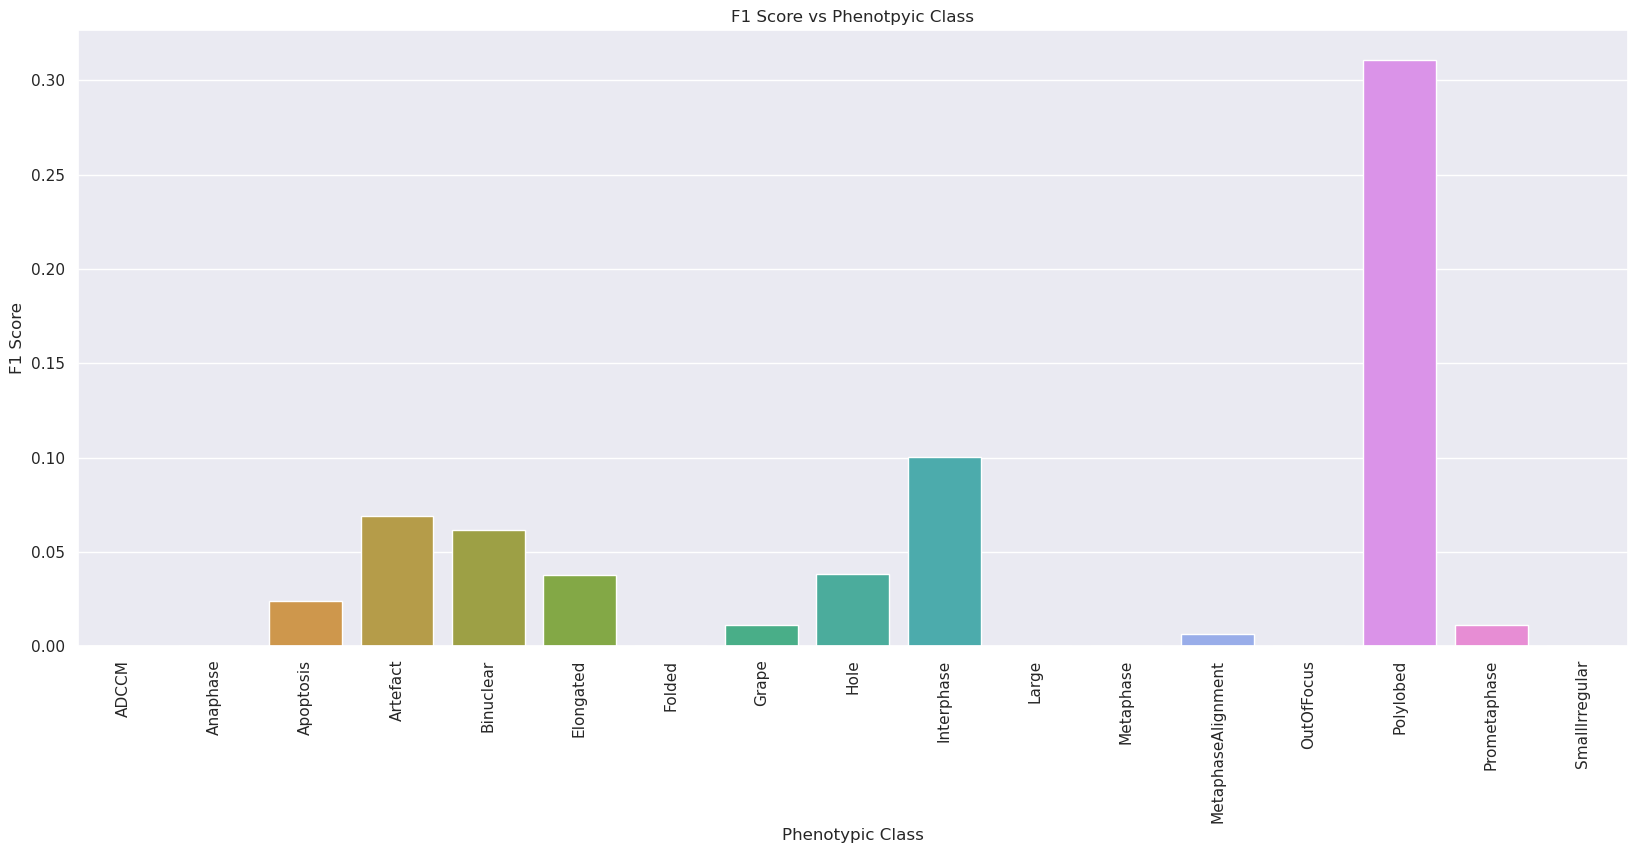

In [16]:
evaluate_model_score(shuffled_baseline_log_reg_model, training_data)

### Evaluate with testing data

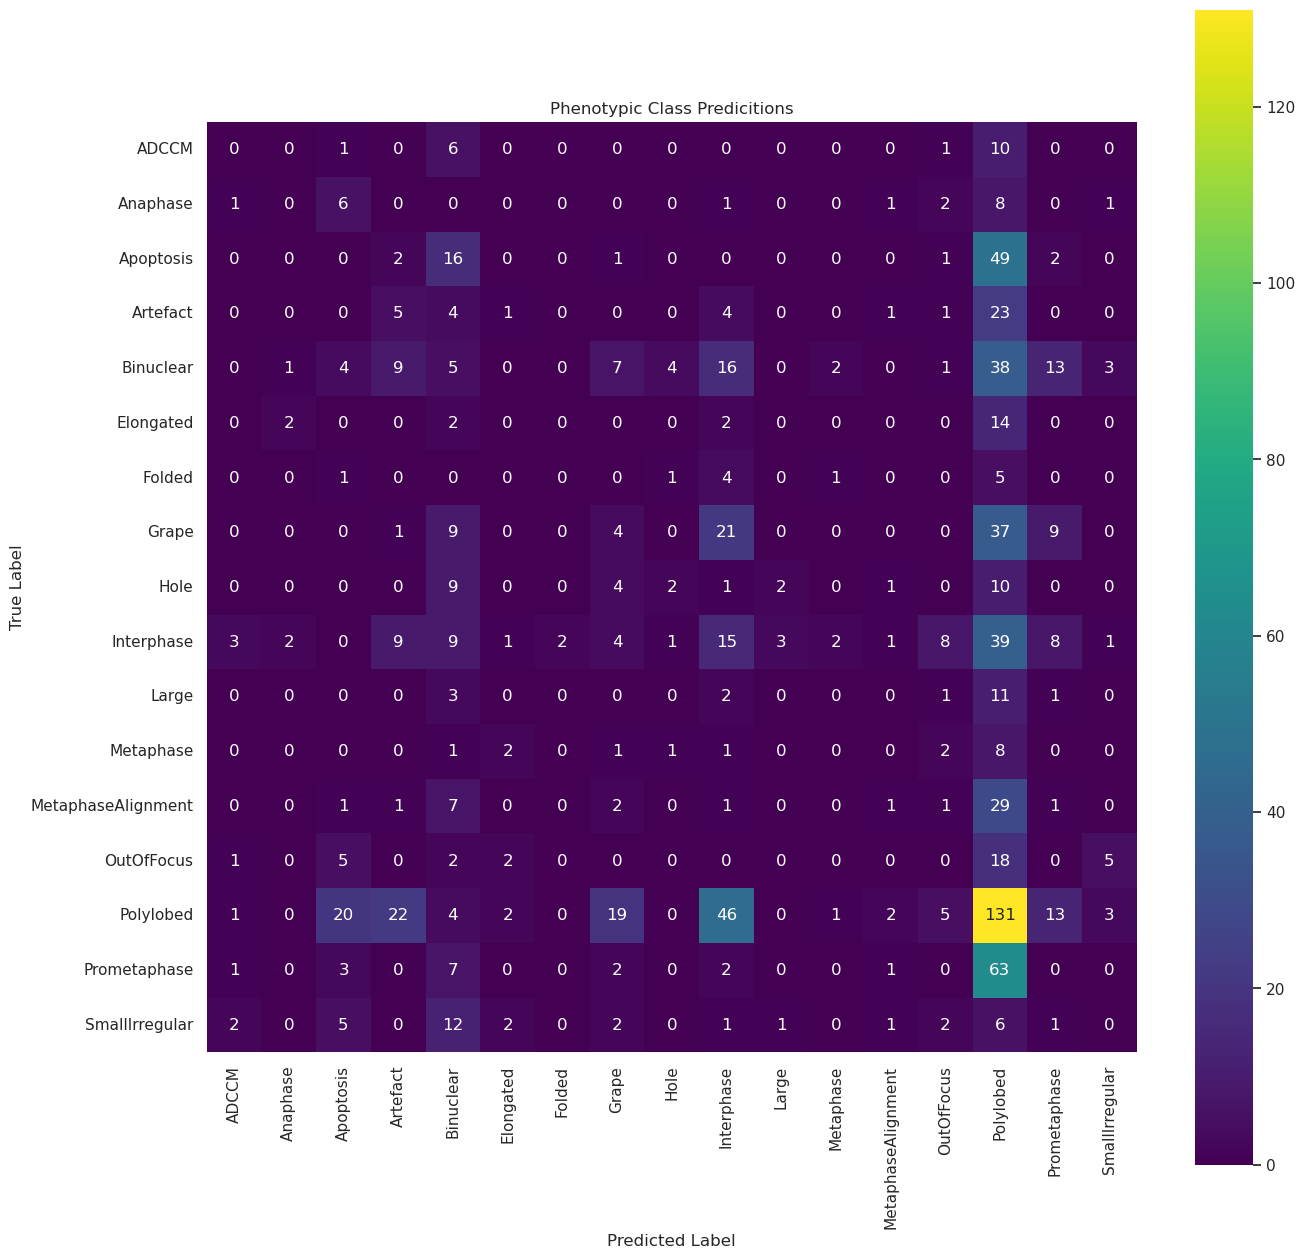

In [17]:
y_test, y_test_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, testing_data)

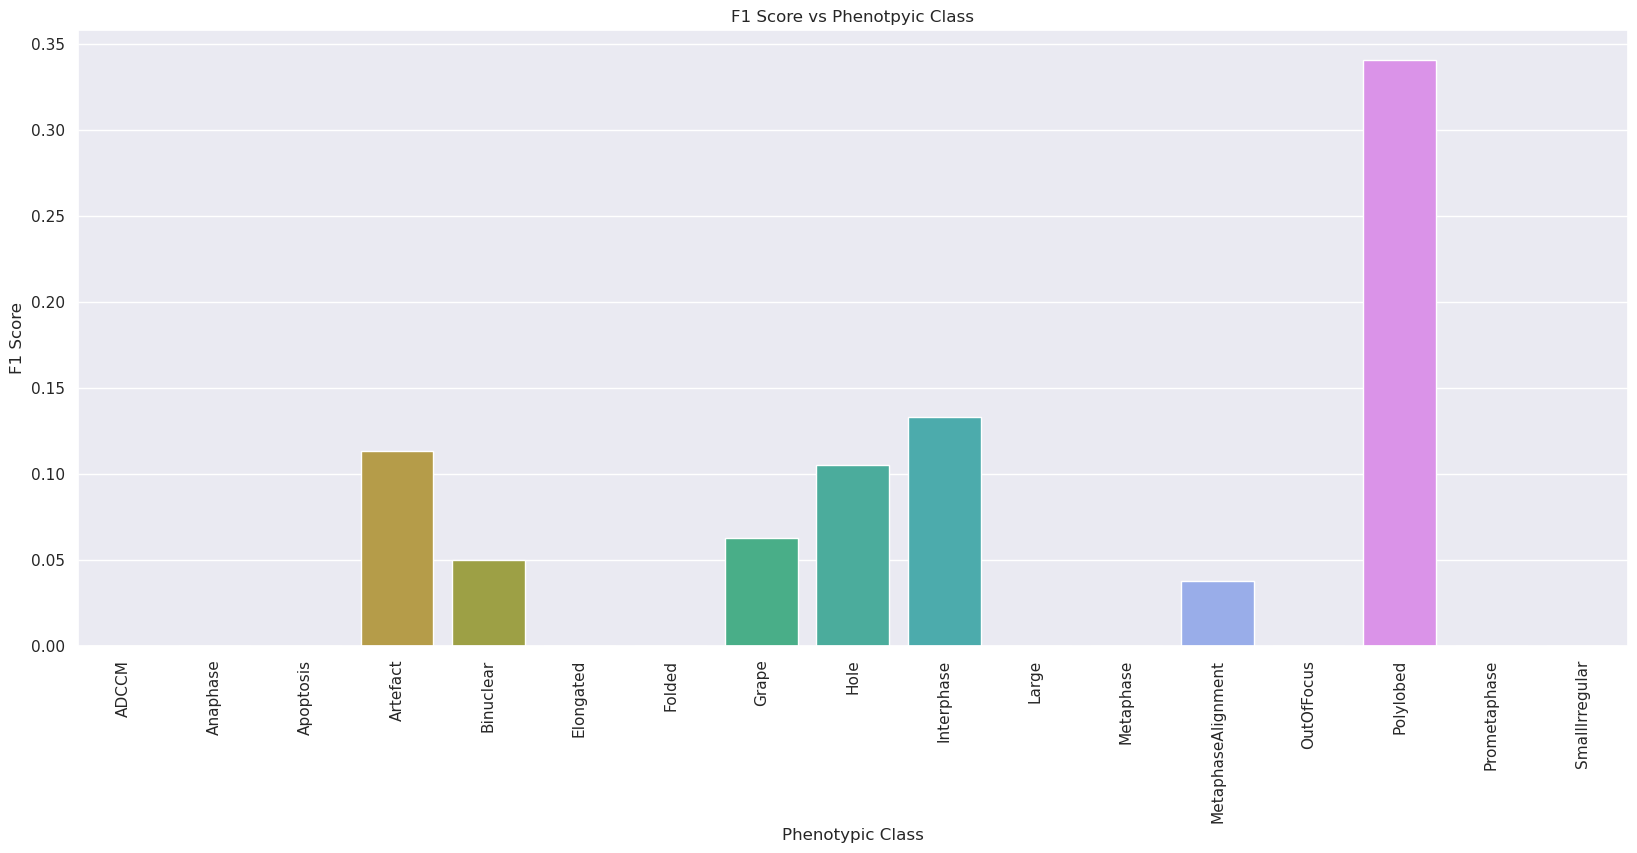

In [18]:
evaluate_model_score(shuffled_baseline_log_reg_model, testing_data)

### Evaluate with holdout data

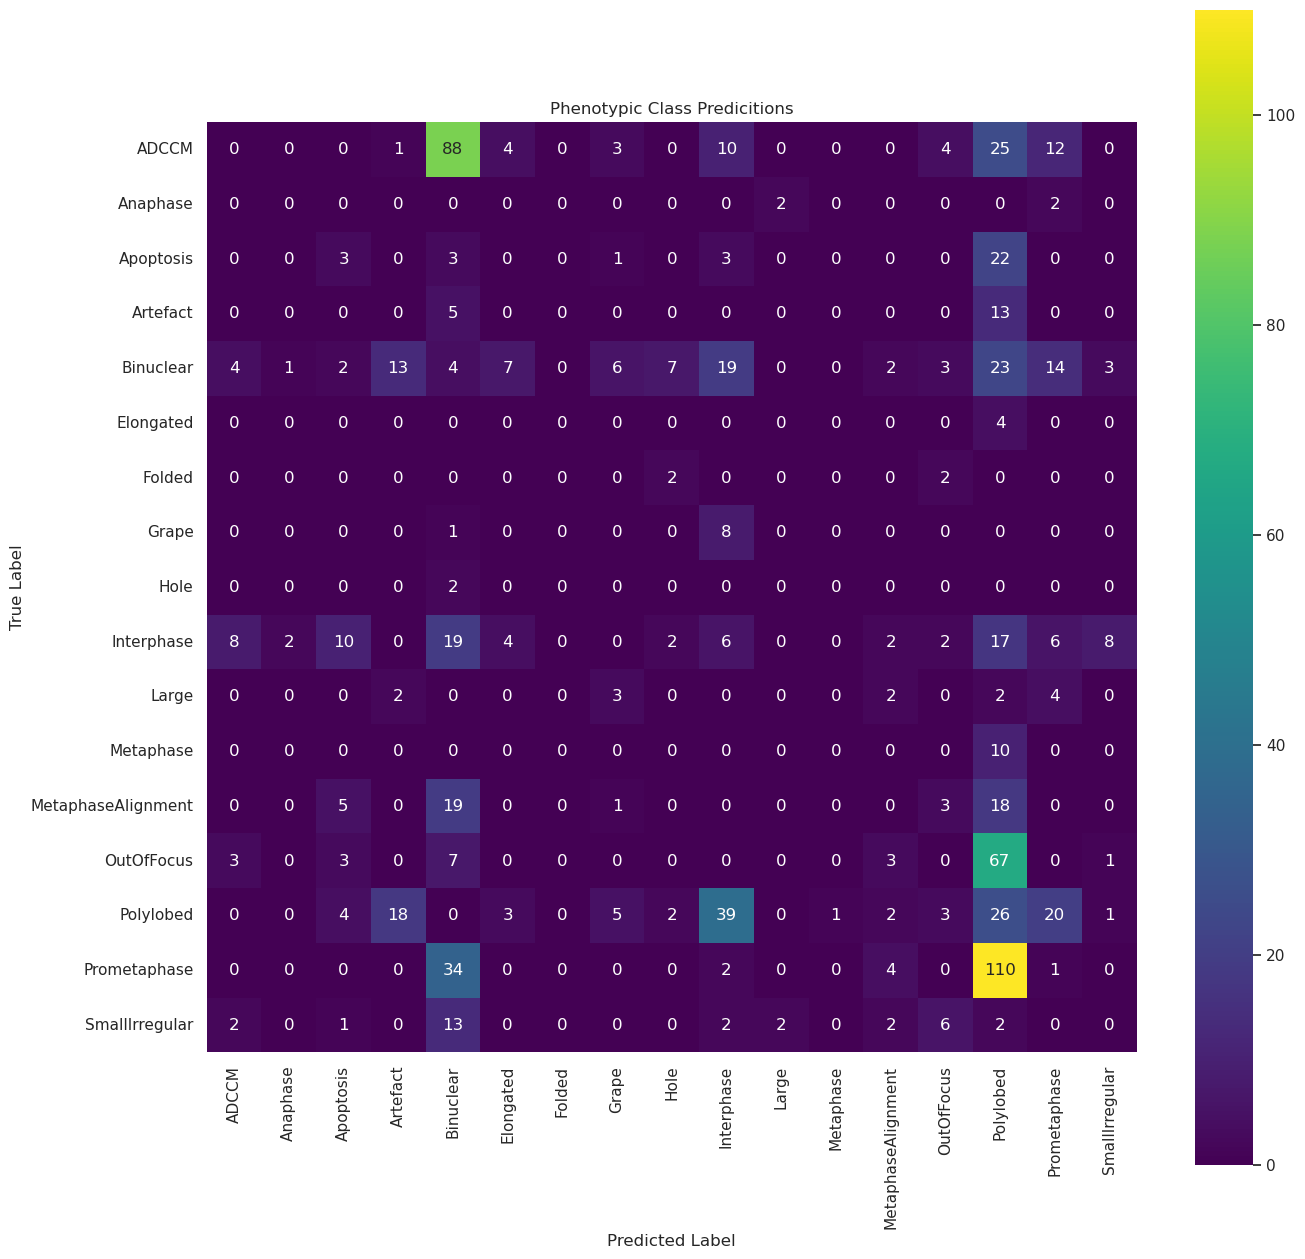

In [19]:
y_holdout, y_holdout_pred = evaluate_model_cm(shuffled_baseline_log_reg_model, holdout_data)

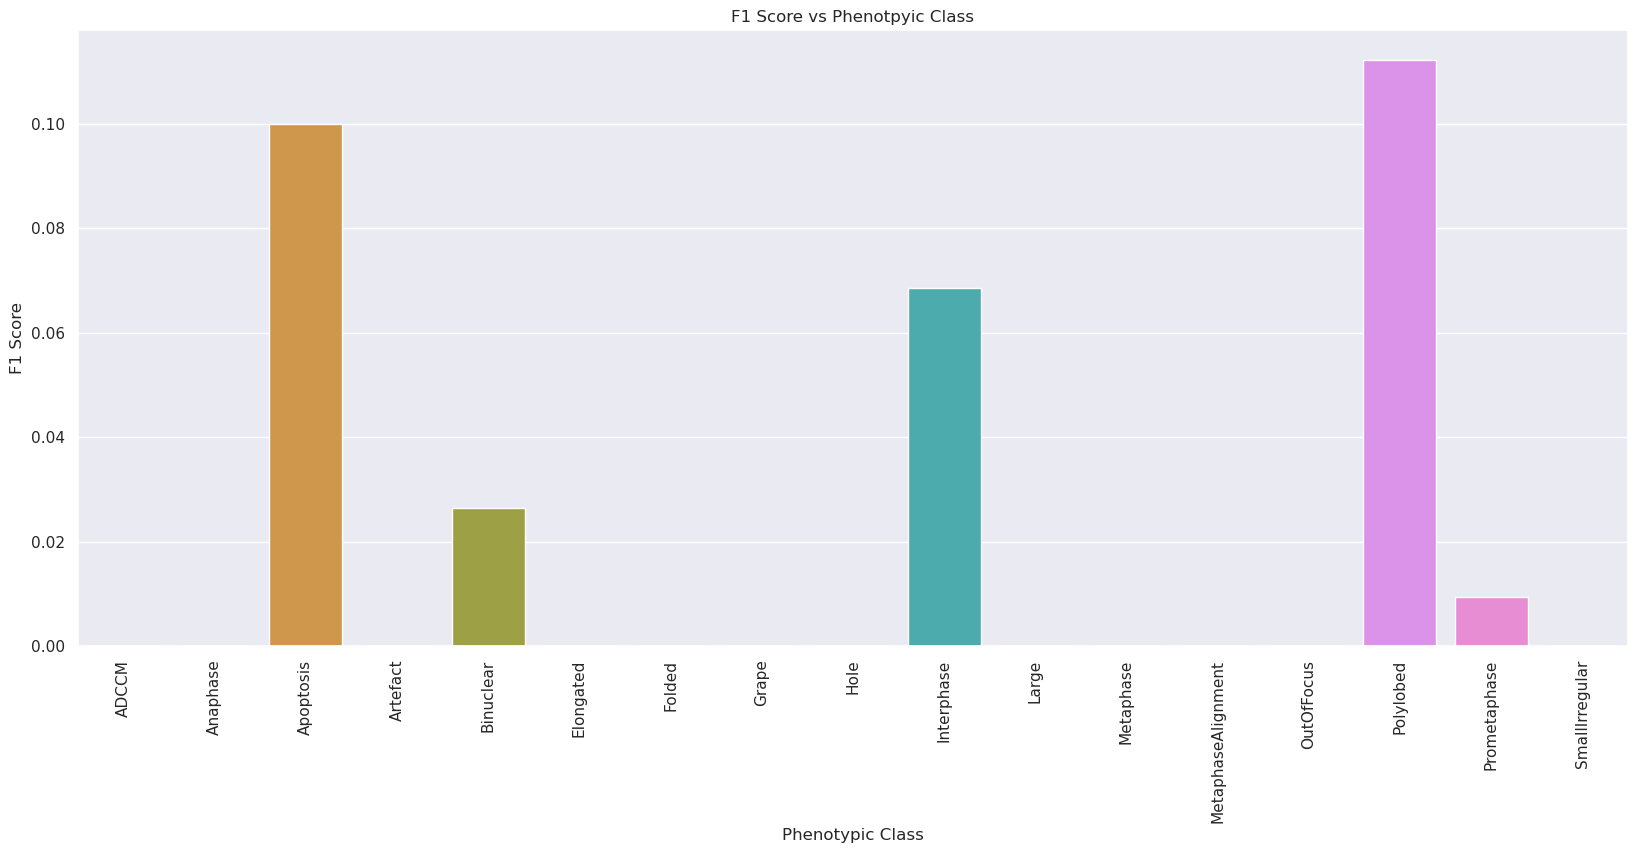

In [20]:
evaluate_model_score(shuffled_baseline_log_reg_model, holdout_data)

### Save trained model predicitions

In [21]:
predictions = []

predictions.append(y_train)
predictions.append(y_train_pred)

predictions.append(y_test)
predictions.append(y_test_pred)

predictions.append(y_holdout)
predictions.append(y_holdout_pred)

predictions = pd.DataFrame(predictions)
predictions.index = ["y_train", "y_train_pred", "y_test", "y_test_pred", "y_holdout", "y_holdout_pred"]
predictions.to_csv(f"{results_dir}/shuffled_baseline_model_predictions.tsv", sep="\t")